In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Promo & Non-Promo Classification

In [ ]:
!pip install pandas tqdm transformers sentence-transformers scikit-learn nltk datasets

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 480.6/480.6 kB 30.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 12.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 179.3/179.3 kB 19.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 134.8/134.8 kB 15.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194.1/194.1 kB 20.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolve

In [ ]:
import pandas as pd
import re
import string
import nltk
import numpy as np
import seaborn as sns
from tqdm import tqdm
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
from sentence_transformers import SentenceTransformer, util
from sklearn.metrics import classification_report
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')
stopwords_id = set(stopwords.words('indonesian'))

def process_text(text):
    # Lowercase
    text = text.lower()

    # Entity masking
    text = re.sub(r'http\S+|www\S+', '_url_', text)
    text = re.sub(r'@\w+', '_username_', text)
    text = re.sub(r'#\w+', '_hashtag_', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Stopwords elimination
    text = ' '.join([word for word in text.split() if word not in stopwords_id])

    return text

# Preprocess Texts
def preprocess_texts(texts):
    processed_texts = []
    for text in tqdm(texts, desc="Preprocessing Texts"):
        tokens = process_text(text)
        processed_texts.append(tokens)
    return processed_texts

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Load Model and Tokenizer
# first_model_path = "/content/drive/MyDrive/TUGAS KULIAH/TUGAS BESAR NLP/MODEL/Promo-Non Classification/IndoBERT-Trainer"
# second_model_path = "/content/drive/MyDrive/TUGAS KULIAH/TUGAS BESAR NLP/MODEL/Promo-Category Classification/IndoBERT"
first_model_path = "/content/drive/MyDrive/TUGAS BESAR NLP/MODEL/Promo-Non Classification/IndoBERT-Trainer"
second_model_path = "/content/drive/MyDrive/TUGAS BESAR NLP/MODEL/Promo-Category Classification/IndoBERT"


In [ ]:
# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(first_model_path)

# Load models
first_model = AutoModelForSequenceClassification.from_pretrained(first_model_path)
second_model = AutoModelForSequenceClassification.from_pretrained(second_model_path)

In [ ]:
# Define pipelines for models
first_pipeline = pipeline("text-classification", model=first_model, tokenizer=tokenizer)
second_pipeline = pipeline("text-classification", model=second_model, tokenizer=tokenizer)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
def analyze_promo(test_dataset_path):
    # Load dataset
    print("\nLoading Test Dataset...")
    df_test = pd.read_csv(test_dataset_path, sep='\t')

    # Preprocess clean_tweet column
    print("\nPreprocessing Texts...")
    df_test['clean_tweet'] = preprocess_texts(df_test['full_text'].tolist())

    print(df_test.head())

    X_test = df_test['clean_tweet'].tolist()
    y_test_promo = df_test['label_promo'].tolist()
    y_test_category = df_test['label_category'].tolist()

    # First Model Predictions (Promo/Non-Promo)
    print("\nRunning First Model (Promo/Non-Promo Classification)...")
    first_preds = []
    promo_indices = []
    promo_texts = []

    for idx, text in enumerate(tqdm(X_test, desc="Processing First Model")):
        result = first_pipeline(text)[0]
        label = int(result['label'].split('_')[-1])
        first_preds.append(label)
        if label == 1:
            promo_indices.append(idx)
            promo_texts.append(text)

    df_test['first_model_pred'] = first_preds

    # Second Model (Promo Category)
    print("\nRunning Second Models...")
    second_preds = [-1] * len(df_test)
    # third_preds = []

    if promo_texts:
        for idx, text in enumerate(tqdm(promo_texts, desc="Processing Second Model")):
            # Promo Category Classification
            second_result = second_pipeline(text)[0]
            second_preds[promo_indices[idx]] = int(second_result['label'].split('_')[-1])

    df_test['second_model_pred'] = second_preds

     # Save Predictions to TSV Files
    print("\nSaving Predictions to TSV Files...")
    # first_model_output_path = "/content/drive/MyDrive/TUGAS KULIAH/TUGAS BESAR NLP/RESULT/first_model_results.tsv"
    # second_model_output_path = "/content/drive/MyDrive/TUGAS KULIAH/TUGAS BESAR NLP/RESULT/second_model_results.tsv"
    first_model_output_path = "/content/drive/MyDrive/TUGAS BESAR NLP/RESULT/first_model_results.tsv"
    second_model_output_path = "/content/drive/MyDrive/TUGAS BESAR NLP/RESULT/second_model_results.tsv"

    df_first = df_test[['full_text', 'label_promo', 'first_model_pred']]
    df_first.to_csv(first_model_output_path, sep='\t', index=False)
    print(f"First Model Results Saved to {first_model_output_path}")

    df_second = df_test.loc[df_test['first_model_pred'] == 1, ['full_text', 'label_category', 'second_model_pred']]
    df_second.to_csv(second_model_output_path, sep='\t', index=False)
    print(f"Second Model Results Saved to {second_model_output_path}")

    # Classification Report for First Model
    print("\nClassification Report for First Model (Promo/Non-Promo):")
    print(classification_report(y_test_promo, first_preds, target_names=["Non-Promo", "Promo"]))

    # Classification Report for Second Model
    if promo_texts:
        print("\nClassification Report for Second Model (Promo Categories):")
        print(classification_report(y_test_category, second_preds))
    else:
        print("\nNo 'Promo' texts classified. Skipping Second Model Report.")

In [ ]:
# test_dataset_path = "/content/drive/MyDrive/TUGAS KULIAH/TUGAS BESAR NLP/COMBINED/new_test_dataset.tsv"
test_dataset_path = "/content/drive/MyDrive/TUGAS BESAR NLP/COMBINED/new_test_dataset.tsv"
analyze_promo(test_dataset_path)


Loading Test Dataset...

Preprocessing Texts...


Preprocessing Texts: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 90/90 [00:00<00:00, 25682.91it/s]


                                           full_text  label_promo  \
0  Pesan paket wisata ke Pulau Komodo dengan harg...            1   
1  Yg mau coba twc luxcrime coba cek dishopee dpe...            1   
2  Streaming musik favoritmu di Spotify Premium! ...            1   
3  30 menit ngescroll gofood, grabfood, shopeefoo...            0   
4  Dapatkan promo menginap di hotel mewah di Lomb...            1   

   label_category                                        clean_tweet  
0               4  pesan paket wisata pulau komodo harga rp200000...  
1               6  yg coba twc luxcrime coba cek dishopee dpet ha...  
2               2  streaming musik favoritmu spotify premium prom...  
3              -1  30 menit ngescroll gofood grabfood shopeefood ...  
4               4  dapatkan promo menginap hotel mewah lombok har...  

Running First Model (Promo/Non-Promo Classification)...


Processing First Model: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 90/90 [00:26<00:00,  3.44it/s]



Running Second Models...


Processing Second Model: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 81/81 [00:13<00:00,  5.92it/s]



Saving Predictions to TSV Files...
First Model Results Saved to /content/drive/MyDrive/TUGAS BESAR NLP/RESULT/first_model_results.tsv
Second Model Results Saved to /content/drive/MyDrive/TUGAS BESAR NLP/RESULT/second_model_results.tsv

Classification Report for First Model (Promo/Non-Promo):
              precision    recall  f1-score   support

   Non-Promo       0.78      1.00      0.88         7
       Promo       1.00      0.98      0.99        83

    accuracy                           0.98        90
   macro avg       0.89      0.99      0.93        90
weighted avg       0.98      0.98      0.98        90


Classification Report for Second Model (Promo Categories):
              precision    recall  f1-score   support

          -1       0.78      1.00      0.88         7
           0       0.89      1.00      0.94         8
           1       1.00      0.93      0.96        14
           2       0.79      0.92      0.85        12
           3       0.88      1.00      0.94     

# Clustering for Promo Data

In [ ]:
#load data
# data_path = "/content/drive/MyDrive/TUGAS KULIAH/TUGAS BESAR NLP/COMBINED/test_dataset.tsv"
data_path = "/content/drive/MyDrive/TUGAS BESAR NLP/COMBINED/test_dataset.tsv"
df = pd.read_csv(data_path, sep='\t')
df.head()

full_text  label_promo  \
0  @sbyfess klo mau murah naik bus damri 30rb cmi...            0   
1  Pesan paket wisata ke Pulau Komodo dengan harg...            1   
2  Itu harga yg keliatan murah krna ada kupon dis...            0   
3  Bayar QRIS pakai SPayLater emang bisa? Bisa do...            1   
4  Yg mau coba twc luxcrime coba cek dishopee dpe...            1   

   label_category  
0              -1  
1               4  
2              -1  
3               6  
4               6

In [ ]:
df = df[df['label_promo'] == 1].copy()
df = df.reset_index(drop=True)
df.head()

full_text  label_promo  \
0  Pesan paket wisata ke Pulau Komodo dengan harg...            1   
1  Bayar QRIS pakai SPayLater emang bisa? Bisa do...            1   
2  Yg mau coba twc luxcrime coba cek dishopee dpe...            1   
3  Streaming musik favoritmu di Spotify Premium! ...            1   
4  Dapatkan promo menginap di hotel mewah di Lomb...            1   

   label_category  
0               4  
1               6  
2               6  
3               2  
4               4

In [ ]:
from sentence_transformers import SentenceTransformer, util
# model_path =  "/content/drive/MyDrive/TUGAS KULIAH/TUGAS BESAR NLP/MODEL/Promo-Clustering/"
model_path =  "/content/drive/MyDrive/TUGAS BESAR NLP/MODEL/Promo-Clustering/"
model = SentenceTransformer(model_path)

## Finding optimal K

In [ ]:
# see if the PCA could lead into a better clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from tqdm import tqdm

def pca_plot(sentences, model = model):
  # Reduce dimensions using PCA
  pca = PCA(n_components=15)
  new_embeddings = model.encode(sentences, convert_to_tensor=True)
  pca_embeddings = pca.fit_transform(new_embeddings.cpu().numpy())

  # Find the right elbow
  sse = []
  for k in tqdm(range(3, 20), desc="Measure optimal k"):
      kmeans = KMeans(n_clusters=k, random_state=42)
      kmeans.fit(pca_embeddings)
      sse.append(kmeans.inertia_)

  # Plot Elbow Curve
  plt.figure(figsize=(12, 6))
  plt.plot(range(3, 20), sse, marker='o')
  plt.xticks(range(3, 20))
  plt.title('Elbow Curve with PCA', fontsize=16)
  plt.xlabel('Number of Clusters (k)', fontsize=14)
  plt.ylabel('Sum of Squared Errors (SSE)', fontsize=14)
  plt.grid()
  plt.show()


Measure optimal k: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 17/17 [00:00<00:00, 82.78it/s]


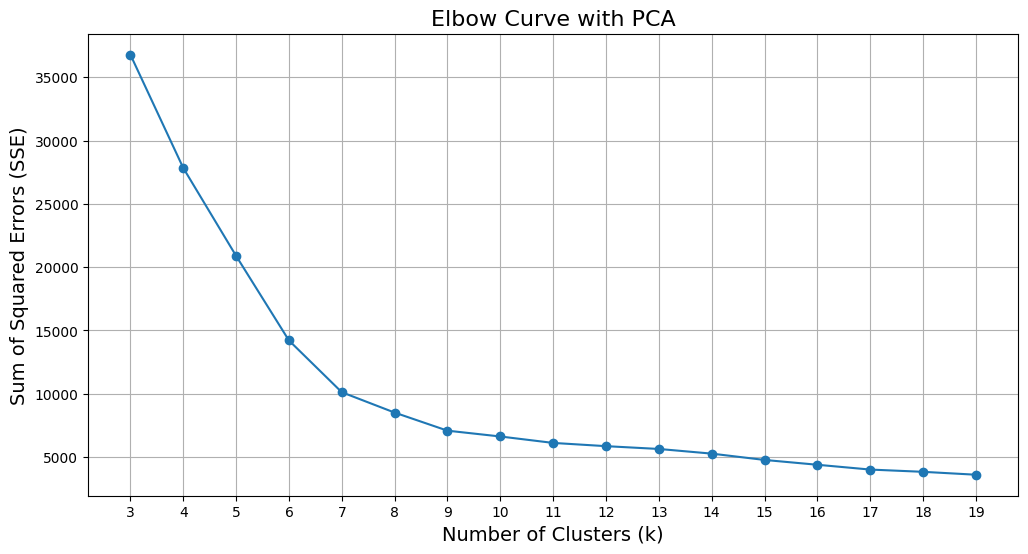

In [ ]:
pca_plot(np.array(df['full_text']))

Dari grafik di atas, bisa dilihat pivot elbow di k = 7 (sesuai dengan jumlah label dataset)

In [ ]:
from sklearn.metrics import silhouette_score

def silhouette_plot(sentences, model=model):
    # Reduce dimensions using PCA
    pca = PCA(n_components=15)
    new_embeddings = model.encode(sentences, convert_to_tensor=True)
    pca_embeddings = pca.fit_transform(new_embeddings.cpu().numpy())

    # Compute silhouette scores for different numbers of clusters
    silhouette_scores = []
    for k in tqdm(range(3, 15), desc="Measure silhouette scores"):
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(pca_embeddings)
        score = silhouette_score(pca_embeddings, cluster_labels)
        silhouette_scores.append(score)

    # Plot Silhouette Scores
    plt.figure(figsize=(12, 6))
    plt.plot(range(3, 15), silhouette_scores, marker='o', color='orange')
    plt.xticks(range(3, 15))
    plt.title('Silhouette Score Curve', fontsize=16)
    plt.xlabel('Number of Clusters (k)', fontsize=14)
    plt.ylabel('Silhouette Score', fontsize=14)
    plt.grid()
    plt.show()

Measure silhouette scores: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:00<00:00, 68.78it/s]


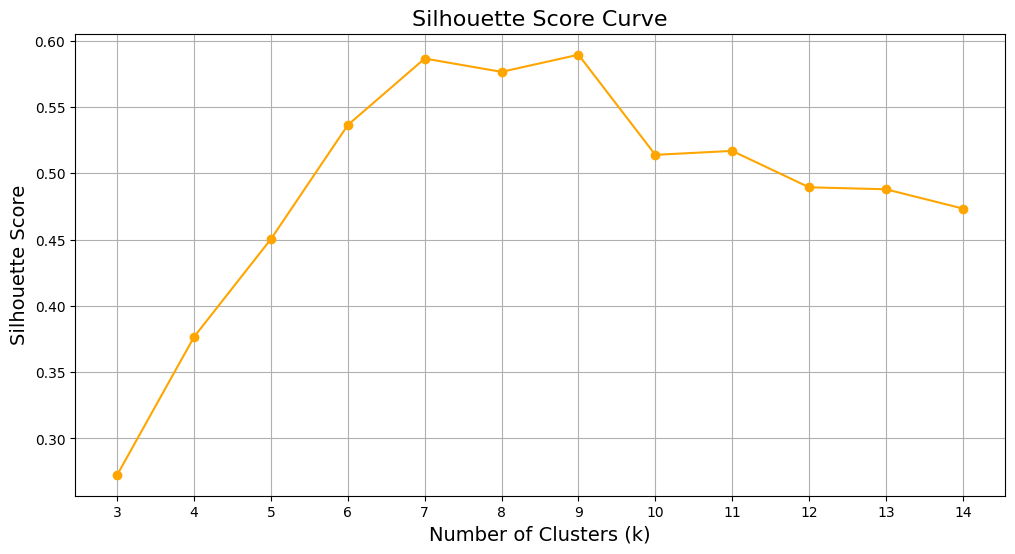

In [ ]:
silhouette_plot(np.array(df['full_text']))

Dari silhoutte analisis, dapat dipilih k = 7  sebagai k optimum untuk clustering

## Clustering Analysis

In [ ]:
_cluster_labels = {
    0 : 'food',
    1  : 'beauty',
    2 : 'entertaiment',
    3 : 'fashion',
    4 : 'technology',
    5 : 'travel & leissure',
    6 : 'others'
}

def the_clustering(df = df, _cluster_labels = _cluster_labels, k = 7):
  #Embeddings
  _df = df.copy()
  sentences = _df['full_text']
  embeddings = model.encode(sentences, convert_to_tensor=True)
  # PCA
  pca = PCA(n_components=15)
  pca_embeddings = pca.fit_transform(embeddings.cpu().numpy())

  #clustering
  kmeans = KMeans(n_clusters=k, random_state=42)
  clusters = kmeans.fit_predict(pca_embeddings)

  # get array of cluster
  cluster_array = kmeans.labels_
  # convert each cluster, for example: 0 -> 'A', 1 -> 'B', etc.
  cluster_array = np.array([chr(65 + i) for i in cluster_array])

  _df['label_text'] = [_cluster_labels[k] for k in _df['label_category']]
  _df['clustering_results'] = cluster_array
  print("Done Performing Clustering....")

  #for every unique cluster, plot the distribution of labels
  for cluster in _df['clustering_results'].unique():
      sns.countplot(x='label_text', data=_df[_df['clustering_results'] == cluster])
      plt.title(f'Distribution of labels for cluster {cluster}')
      plt.show()

Done Performing Clustering....


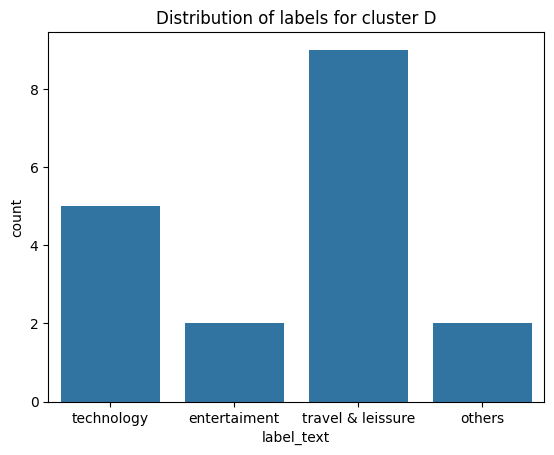

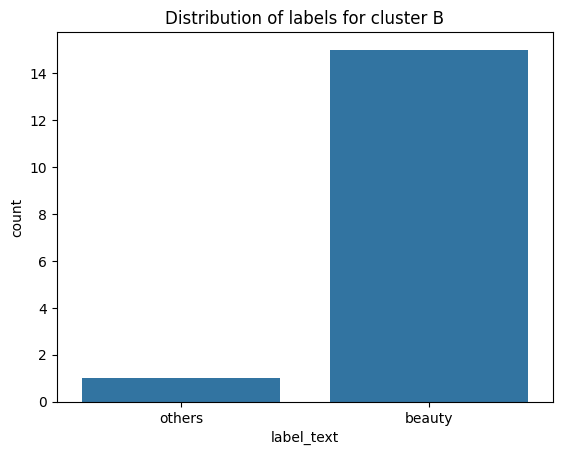

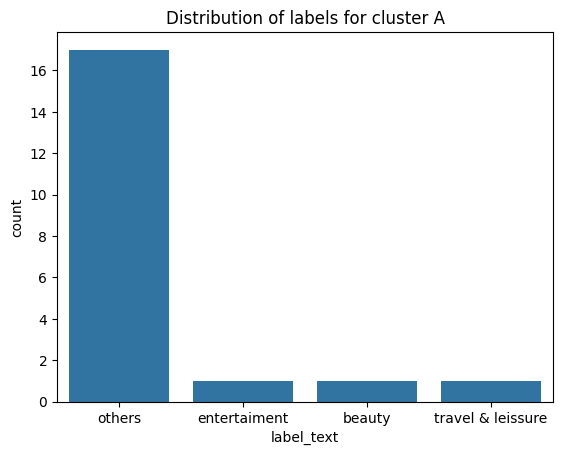

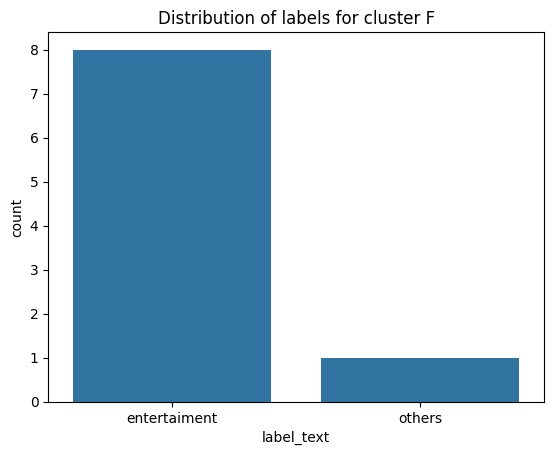

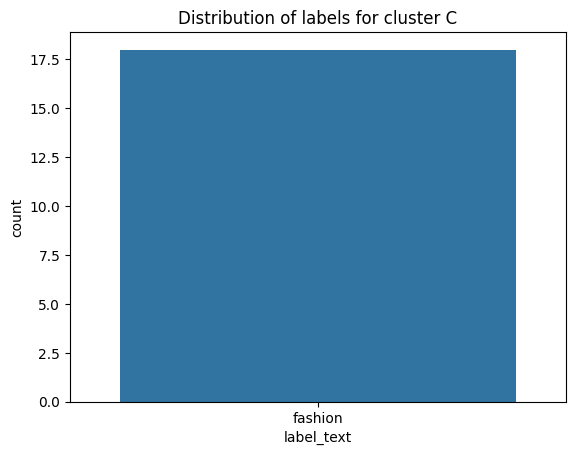

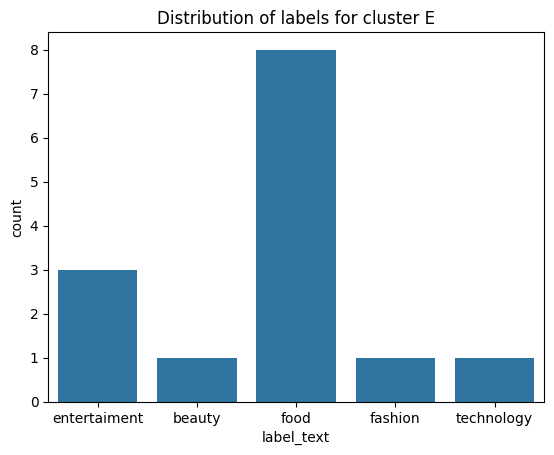

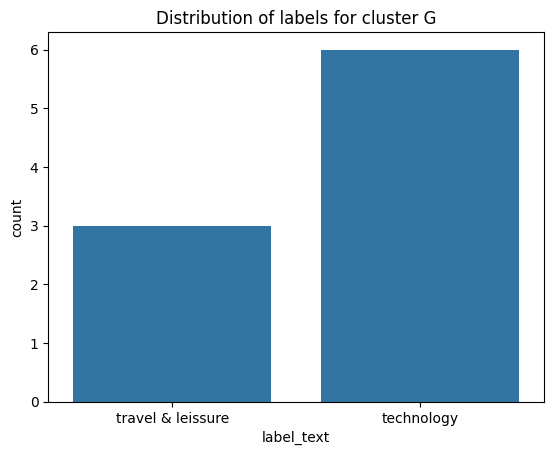

In [ ]:
the_clustering()

Done Performing Clustering....


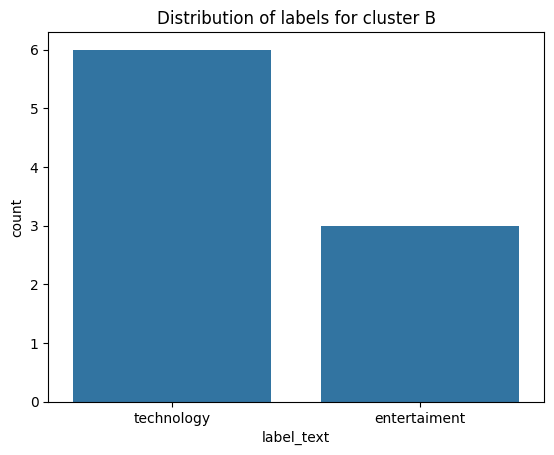

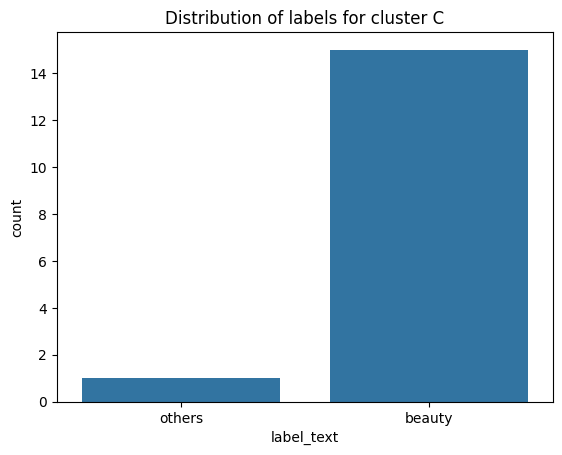

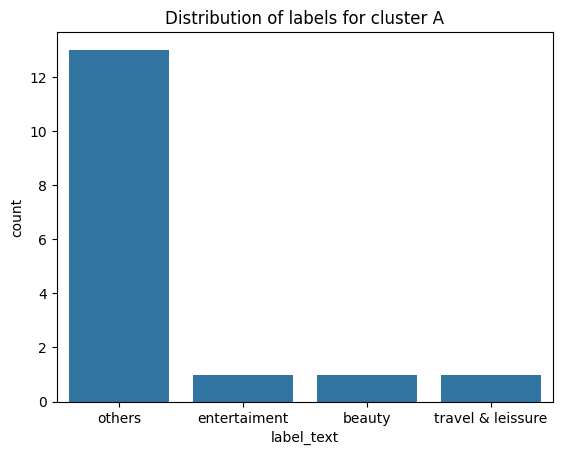

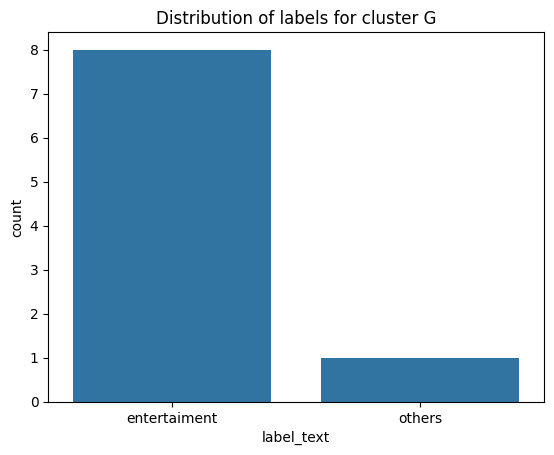

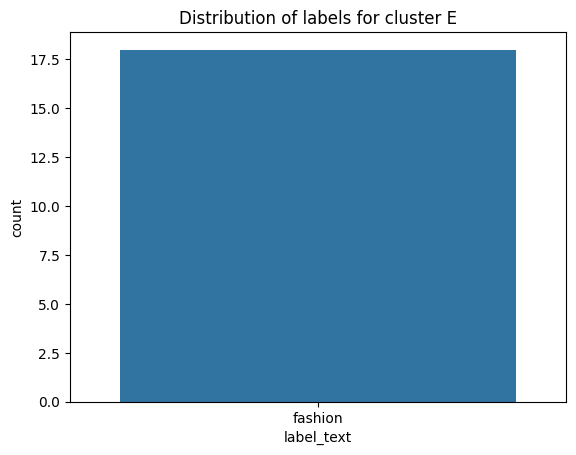

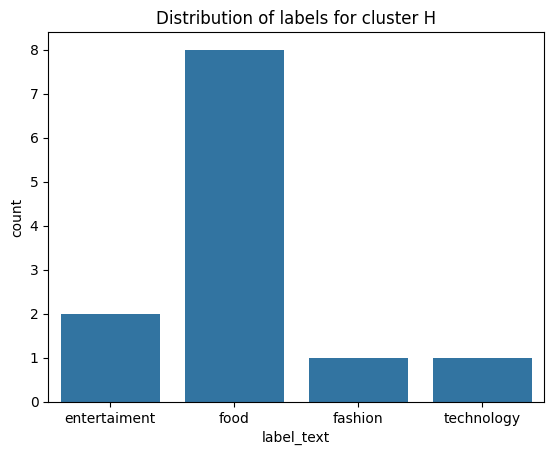

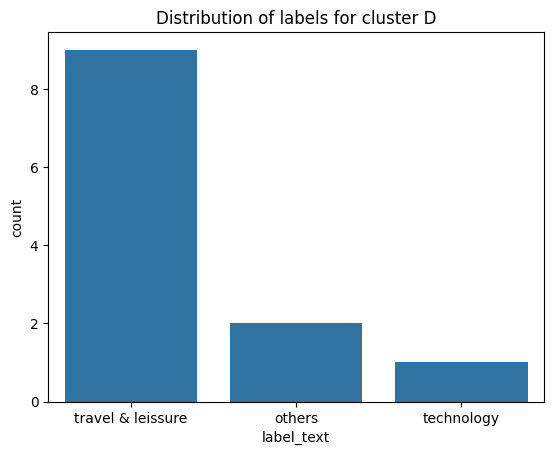

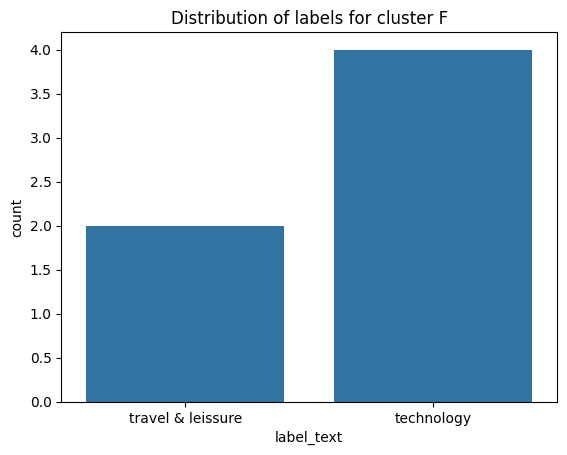

In [ ]:
the_clustering(k=9)

In [ ]:
def cluster_plot(df = df, k =7):
  #Embeddings
  _df = df.copy()
  sentences = _df['full_text']
  embeddings = model.encode(sentences, convert_to_tensor=True)
  # PCA
  pca = PCA(n_components=2)
  pca_embeddings = pca.fit_transform(embeddings.cpu().numpy())
  #clustering
  kmeans = KMeans(n_clusters=k, random_state=42)
  clusters = kmeans.fit_predict(pca_embeddings)

  plt.figure(figsize=(10, 7))
  plt.scatter(pca_embeddings[:, 0], pca_embeddings[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.7)
  plt.title('2D Visualization of Sentence Embeddings using PCA', fontsize=16)
  plt.xlabel('PCA Component 1')
  plt.ylabel('PCA Component 2')
  plt.colorbar()  # Show color bar to represent clusters
  plt.show()

In [ ]:
cluster_plot()

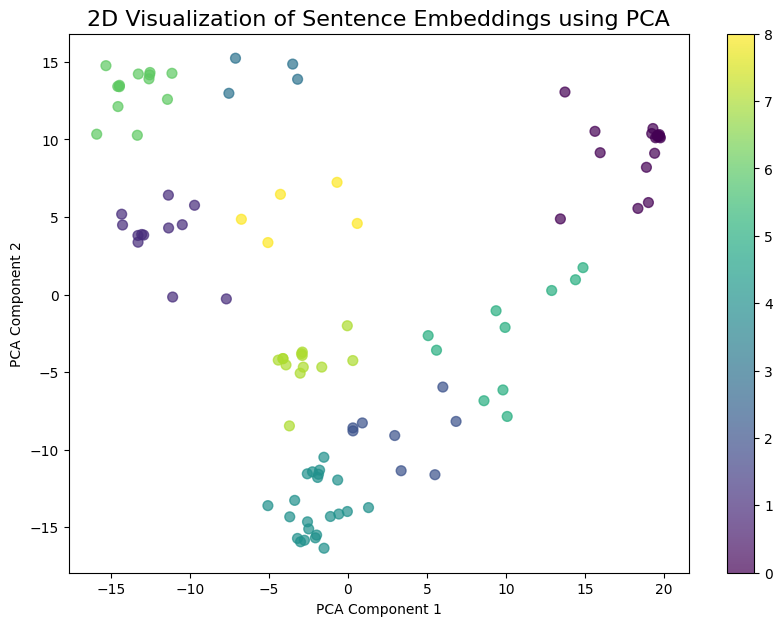

In [ ]:
cluster_plot(k=9)

# Name Entity Recognition for Promo Data

In [ ]:
#LOAD MODEL
import spacy

# spacy_model_path = "/content/drive/MyDrive/TUGAS KULIAH/TUGAS BESAR NLP/MODEL/Promo-NER/"
spacy_model_path = "/content/drive/MyDrive/TUGAS BESAR NLP/MODEL/Promo-NER/"
loaded_nlp = spacy.load(spacy_model_path)
print("Model berhasil dimuat kembali!")


Model berhasil dimuat kembali!


In [ ]:
# LOAD DATASET
import json

# test_data_path = '/content/drive/MyDrive/TUGAS KULIAH/TUGAS BESAR NLP/COMBINED/test_dataset_ner.json'
test_data_path = '/content/drive/MyDrive/TUGAS BESAR NLP/COMBINED/test_dataset_ner.json'
# read json
with open(test_data_path) as f:
  test_data = json.load(f)


In [ ]:
from collections import Counter

def evaluate_ner(actual_entities, predicted_entities):
    tp = 0  # True Positives
    fp = 0  # False Positives
    fn = 0  # False Negatives

    # Iterasi untuk mencocokkan actual dan predicted
    for actual_text, actual_label in actual_entities:
        match_found = False
        for predicted_text, predicted_label in predicted_entities:
            if actual_label == predicted_label:  # Cek label cocok
                # Cek subset match
                if predicted_text in actual_text or actual_text in predicted_text:
                    tp += 1
                    match_found = True
                    break
        if not match_found:
            fn += 1  # Tidak ditemukan pasangan yang cocok untuk entitas aktual

    # Hitung false positives
    for predicted_text, predicted_label in predicted_entities:
        match_found = False
        for actual_text, actual_label in actual_entities:
            if predicted_label == actual_label:  # Cek label cocok
                # Cek subset match
                if predicted_text in actual_text or actual_text in predicted_text:
                    match_found = True
                    break
        if not match_found:
            fp += 1  # Tidak ditemukan pasangan yang cocok untuk entitas prediksi

    # Total Entities
    total_entities = len(actual_entities) + len(predicted_entities) - tp

    # Hitung metrik
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    accuracy = tp / total_entities if total_entities > 0 else 0

    return {"precision": precision, "recall": recall, "f1": f1, "accuracy": accuracy}

# Evaluasi data test
overall_results = Counter()  # Untuk menghitung rata-rata
for text, annotations in test_data:
    print("Text: ", text)
    # Parse annotations to extract actual entities
    actual_entities = [(text[ent[0]:ent[1]], ent[2]) for ent in annotations["entities"]]
    print("Actual Entities: ", actual_entities)

    # Predicted annotations
    doc = loaded_nlp(text)  # Predict using the trained model
    predicted_entities = [(ent.text, ent.label_) for ent in doc.ents]

    print("Predicted Entities: ", predicted_entities)
    print()

    # Hitung metrik untuk teks ini
    results = evaluate_ner(actual_entities, predicted_entities)

    # Update hasil keseluruhan
    overall_results.update(results)

# Hitung rata-rata untuk keseluruhan data test
average_precision = overall_results["precision"] / len(test_data)
average_recall = overall_results["recall"] / len(test_data)
average_f1 = overall_results["f1"] / len(test_data)

print("Overall Performance:")
print(f"Precision: {average_precision:.2f}, Recall: {average_recall:.2f}, F1: {average_f1:.2f}")

Text:  WTS PROMO NONTON DI BIOSKOP CGV FREE POPCORN Order via wa: https://t.co/SYP4OoXsiF Ô∏è Diskon Tiket Mins. Harga 1 tiket* 35k. Jadinya 30k/tix FREE ADMIN &amp; FREE FEE *Harga 1 tiket tergantung lokasi FREE POPCORN min. Pembelian 2 Tiket Tg wts murah voucher diskon kode https://t.co/GKNwxSZFwg
Actual Entities:  [('BIOSKOP', 'LOCATION'), ('CGV', 'PLATFORM'), ('FREE POPCORN', 'PROMO'), ('Harga 1 tiket* 35k. Jadinya 30k/tix', 'PROMO'), ('FREE ADMIN', 'PROMO'), ('FREE FEE', 'PROMO'), ('FREE POPCORN', 'PROMO'), ('voucher diskon', 'PRODUCT')]
Predicted Entities:  [('CGV', 'PLATFORM'), ('FREE POPCORN', 'PROMO'), ('Harga 1 tiket* 35k. Jadinya 30k/tix', 'PROMO'), ('FREE ADMIN', 'PROMO'), ('FREE FEE', 'PROMO'), ('FREE POPCORN', 'PROMO'), ('voucher diskon', 'PRODUCT')]

Text:  DISKON MAKANAN &amp; MINUMAN PROMO 10.10 A thread https://t.co/zwAyoQQorY
Actual Entities:  [('PROMO 10.10', 'EVENT')]
Predicted Entities:  [('DISKON MAKANAN &amp;', 'PROMO'), ('MINUMAN', 'PRODUCT'), ('PROMO 10.10', '



## Kesimpulan

### 1. Data
- **Sumber Data**: Tweet yang dikumpulkan melalui *scraping*
- **Penyimpanan**: di Google Drive dan GitHub

### 2. Klasifikasi Promo/Non-Promo
- **Model**: IndoBERT
- **Proses Pelatihan**: 4 epoch
- **Performa Memuaskan**:
  - Akurasi: 98%
  - F1-Score: 98%
  - Recall: 98%
  - Presisi: 98%

### 3. Klasifikasi Kategori Promosi
- **Model**: IndoBERT
- **Proses Pelatihan**: 5 epoch
- **Performa yang =Cukup Memuaskan**:
  - Akurasi: 83%
  - F1-Score: 82%
  - Recall: 83%
  - Presisi: 83%

### 4. Clustering Promosi
- **Teknik**: *Sentence Transformers*
- **Model**: Indo Sentence Bert Base
- **Fine-Tuning**: 2 epoch
- **Metode Evaluasi**:
  - Sum of Squared Error (SSE)
  - *Silhouette Score*
- **Temuan Kunci**:
  - Jumlah klaster optimal: 7
  - Klasterisasi berhasil memisahkan data dengan baik
  - Setiap klaster memiliki label dominan yang sesuai dengan *ground truth*

### 5. Named Entity Recognition (NER) untuk Promosi
- **Capaian**: Berhasil mengidentifikasi entitas dalam tweet promosi, namun masih ada Name Entity yang belum terekognisi dengan tepat
- **Model**:  Spacy CRF (Conditional Random Fields)
- **Tantangan**: Beberapa entitas masih sulit dikenali
- **Metrik Performa**:
  - Presisi: 0.74
  - Recall: 0.61
  - F1-Score: 0.64
